## 下面要分析数据，重点就是作图，图多不惊人，惊人死不休
* SDFcostlog/enhanced_benchmark_cost_scatter_Left.csv ： 记录2D两点，障碍物左右移动的数据, lapcount = 20 , 特别的20-reward权重数据没有收录
* SDFcostlog/enhanced_benchmark_cost_scatter_UP.csv ： 记录2D两点， 障碍物上下移动的数据， lapcount = 20
* SDFcostlog/enhanced_benchmark_PM_scatter_LEFT.csv : 记录2D两点， 并行算法下的 障碍物左右 上下移动的数据
* SDFcostlog/enhanced_benchmark_PM_scatter_UP.csv 

## 首先分析 benchmark_cost_scatter_LeftRight

In [4]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# 使用Pandas读取CSV文件
df = pd.read_csv('./enhanced_benchmark_cost_scatter_Left.csv')
average_rows = df[df['note'] == 'average']
averages_no_outliers = df[df['note'] == 'averages_no_outliers'] 



# 创建一个1行2列的子图布局
fig = make_subplots(rows=1, cols=2, subplot_titles=('Collision Count vs While Loop Count', 'Crash Rate vs Path Length'))

# 第一个散点图的设置
fig.add_trace(
    go.Scatter(
        x=df['collision_count'], 
        y=df['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=df[['coll_w', 'goal_w', 'reward_w']],
        name='Collision/While Loop'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=average_rows['collision_count'], 
        y=average_rows['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=average_rows[['coll_w', 'goal_w', 'reward_w']],
        name='Collision/While Loop'
    ),
    row=1, col=1
)


# 第一个散点图的X、Y轴范围
fig.update_xaxes(title_text="Collision Count", range=[-10, 120], row=1, col=1)
fig.update_yaxes(title_text="While Loop Count", range=[2300, 3500], row=1, col=1)

# 第二个散点图的设置
fig.add_trace(
    go.Scatter(
        x=df['crash_rate'], 
        y=df['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=df[['coll_w', 'goal_w', 'reward_w']],
        name='Crash Rate/Path Length'
    ),
    row=1, col=2
)
# 第二个散点图的设置
fig.add_trace(
    go.Scatter(
        x=average_rows['crash_rate'], 
        y=average_rows['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=average_rows[['coll_w', 'goal_w', 'reward_w']],
        name='Crash Rate/Path Length'
    ),
    row=1, col=2
)

# 第二个散点图的X、Y轴范围
fig.update_xaxes(title_text="Crash Rate", range=[-5, 60], row=1, col=2)
fig.update_yaxes(title_text="Path Length", range=[27, 42], row=1, col=2)

# 更新整体布局设置
fig.update_layout(
    title_text="Combined Subplots with Custom axis ranges"
)

# 显示整个布局
fig.show()

# 如果你想保存成图片，需要安装kaleido：pip install -U kaleido
# 并且可以使用：
# fig.write_image("combined_plots.png")

## SDFcostlog/benchmark_PM_scatter_LeftRight.csv 加上并行算法 左右实验的数据

In [5]:
## 首先对文件数据预处理 清洗出 非数字开头的注释行
import pandas as pd
from io import StringIO

df = pd.read_csv('./enhanced_benchmark_PM_scatter_LEFT.csv')
average_rows = df[df['note'] == 'average']
averages_no_outliers = df[df['note'] == 'averages_no_outliers'] 

In [35]:
## 两个df 与 df_PM 数据合在一起
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from io import StringIO

df = pd.read_csv('./enhanced_benchmark_cost_scatter_Left.csv')
average_rows = df[(df['note'] == 'average') & (df['reward_w'] == 1.0)]
averages_no_outliers = df[(df['note'] == 'averages_no_outliers') & (df['reward_w'] == 1.0)]

df = averages_no_outliers

df_PM = pd.read_csv('./enhanced_benchmark_PM_scatter_LEFT.csv')
average_rows = df_PM[df_PM['note'] == 'average']
averages_no_outliers = df_PM[df_PM['note'] == 'averages_no_outliers'] 
df_PM = averages_no_outliers

# 获取 DataFrame 的行数
num_rows = len(df_PM)
# 计算每份的行数
split_size = num_rows // 3
# 划分 DataFrame 为三份
df_PM_split1 = df_PM.iloc[:split_size]
df_PM_split2 = df_PM.iloc[split_size:2*split_size]
df_PM_split3 = df_PM.iloc[2*split_size:]
df_PM = df_PM_split1

# 现在df中包含了数据，并忽略了任何非数字开头的行。



# 创建一个1行2列的子图布局
fig = make_subplots(rows=1, cols=2, subplot_titles=('Collision Count vs While Loop Count', 'Crash Rate vs Path Length'))

# 第一个散点图的设置
fig.add_trace(
    go.Scatter(
        x=df['collision_count'], 
        y=df['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=df[['coll_w', 'goal_w', 'reward_w']],
        name='Collision/While Loop'
    ),
    row=1, col=1
)
# 第二个数据源df_PM的散点图，用于'Collision Count vs While Loop Count'
fig.add_trace(
    go.Scatter(
        x=df_PM_split1['collision_count'], 
        y=df_PM_split1['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM_split1[['judge_coll_weight']],
        name='df_PM Collision/While Loop'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_PM_split2['collision_count'], 
        y=df_PM_split2['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM_split2[['judge_coll_weight']],
        name='df_PM Collision/While Loop'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_PM_split3['collision_count'], 
        y=df_PM_split3['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM_split3[['judge_coll_weight']],
        name='df_PM Collision/While Loop'
    ),
    row=1, col=1
)
# 第一个散点图的X、Y轴范围
fig.update_xaxes(title_text="Collision Count", range=[-10, 120], row=1, col=1)
fig.update_yaxes(title_text="While Loop Count", range=[2300, 3500], row=1, col=1)

# 第二个散点图的设置
fig.add_trace(
    go.Scatter(
        x=df['crash_rate'], 
        y=df['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=df[['coll_w', 'goal_w', 'reward_w']],
        name='Crash Rate/Path Length'
    ),
    row=1, col=2
)

# 第二个数据源df_PM的散点图，用于'Crash Rate vs Path Length'
fig.add_trace(
    go.Scatter(
        x=df_PM_split1['crash_rate'], 
        y=df_PM_split1['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM_split1[['judge_coll_weight']],
        name='df_PM Crash Rate/Path Length'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(
        x=df_PM_split2['crash_rate'], 
        y=df_PM_split2['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM_split2[['judge_coll_weight']],
        name='df_PM Crash Rate/Path Length'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(
        x=df_PM_split3['crash_rate'], 
        y=df_PM_split3['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM_split3[['judge_coll_weight']],
        name='df_PM Crash Rate/Path Length'
    ),
    row=1, col=2
)


# 第二个散点图的X、Y轴范围
fig.update_xaxes(title_text="Crash Rate", range=[-5, 35], row=1, col=2)
fig.update_yaxes(title_text="Path Length", range=[20, 40], row=1, col=2)

# 更新整体布局设置
fig.update_layout(
    title_text="Combined Subplots with Custom axis ranges"
)

# 显示整个布局
fig.show()

# 如果你想保存成图片，需要安装kaleido：pip install -U kaleido
# 并且可以使用：
# fig.write_image("combined_plots.png")

In [39]:
from dis import show_code
from pickle import FALSE
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from io import StringIO

from scipy.__config__ import show

def plot_scatter_from_csv(file_names, specific_weights, PM_weight,autoscale = False):

    # 使用Pandas读取CSV文件
    df = pd.read_csv(file_names[0])
    average_rows = df[(df['note'] == 'average') & (df['reward_w'] == 1.0)]
    averages_no_outliers = df[(df['note'] == 'averages_no_outliers') & (df['reward_w'] == 1.0)]
    df = averages_no_outliers

    df_PM = pd.read_csv(file_names[1])
    average_rows = df_PM[df_PM['note'] == 'average']
    averages_no_outliers = df_PM[df_PM['note'] == 'averages_no_outliers']
    df_PM = averages_no_outliers

    # 获取 DataFrame 的行数
    num_rows = len(df_PM)
    # 计算每份的行数
    split_size = num_rows // 3
    # 划分 DataFrame 为三份
    df_PM_split1 = df_PM.iloc[:split_size]
    df_PM_split2 = df_PM.iloc[split_size:2*split_size]
    df_PM_split3 = df_PM.iloc[2*split_size:]
    df_PM = df_PM_split1

    # 创建一个1行2列的子图布局
    fig = make_subplots(rows=1, cols=2)
    #  subplot_titles=('Collision Count vs While Loop Count', 'Crash Rate vs Path Length'))

    # 定义使用的颜色
    color_df = 'blue'  # df数据集的蓝色
    color_df_PM = 'green'  # df_PM数据集的红色

    # Parse specific_weights dictionary
    goal_w = specific_weights.get('goal_w')
    coll_w = specific_weights.get('coll_w')
    if goal_w is None or coll_w is None or PM_weight is None: 
        print("Invalid specific weights provided!")
        return
    
    # 第一个数据源df散点图的设置
    fig.add_trace(
        go.Scatter(
            x=df['collision_count'],
            y=df['whileloop_count'],
            mode='markers',
            hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                        "coll_w: %{customdata[0]}<br>" +
                        "goal_w: %{customdata[1]}<br>" +
                        "reward_w: %{customdata[2]}<extra></extra>",
            customdata=df[['coll_w', 'goal_w', 'reward_w']],
            marker=dict(color=color_df),
            name='Singel_layer MPPI'
        ),
        row=1, col=1
    )

    # 添加第二个数据源df_PM的散点图
    fig.add_trace(
        go.Scatter(
            x=df_PM['collision_count'],
            y=df_PM['whileloop_count'],
            mode='markers',
            hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                        "judge_coll_weight: %{customdata[0]}<extra></extra>",
            customdata=df_PM[['judge_coll_weight']],
            marker=dict(color=color_df_PM),
            name='PM MPPI'
        ),
        row=1, col=1
    )
    # 添加第二个数据源df_PM的散点图
    fig.add_trace(
        go.Scatter(
            x=df_PM_split3['collision_count'],
            y=df_PM_split3['whileloop_count'],
            mode='markers',
            hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                        "judge_coll_weight: %{customdata[0]}<extra></extra>",
            customdata=df_PM_split3[['judge_coll_weight']],
            name='PM MPPI'
        ),
        row=1, col=1
    )


    # 第一个数据源df散点图的设置
    fig.add_trace(
        go.Scatter(
            x=df['crash_rate'], 
            y=df['path_length'],
            mode='markers',
            hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                        "coll_w: %{customdata[0]}<br>" +
                        "goal_w: %{customdata[1]}<br>" +
                        "reward_w: %{customdata[2]}<extra></extra>",
            customdata=df[['coll_w', 'goal_w', 'reward_w']],
            marker=dict(color=color_df),
            name='df Crash Rate/Path Length',
            showlegend=False
        ),
        row=1, col=2
    )

    # 添加第二个数据源df_PM散点图的设置
    fig.add_trace(
        go.Scatter(
            x=df_PM['crash_rate'], 
            y=df_PM['path_length'],
            mode='markers',
            hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                        "judge_coll_weight: %{customdata[0]}<extra></extra>",
            customdata=df_PM[['judge_coll_weight']],
            marker=dict(color=color_df_PM),
            name='df_PM Crash Rate/Path Length',
            showlegend=False
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(
            x=df_PM_split3['crash_rate'], 
            y=df_PM_split3['path_length'],
            mode='markers',
            hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                        "judge_coll_weight: %{customdata[0]}<extra></extra>",
            customdata=df_PM_split3[['judge_coll_weight']],
            name='df_PM Crash Rate/Path Length',
            showlegend=False
        ),
        row=1, col=2
    )

    # Identify rows that match the specific weights
    df_specific_data = df[(df['goal_w'] == goal_w) & (df['coll_w'] == coll_w)]
    # Identify rows that match the specific weights
    df_PM_specific_data = df_PM[(df_PM['judge_coll_weight'] == PM_weight)]

    # Highlight the last point (if it exists)
# Highlight the last point (if it exists)
    if not df_specific_data.empty and not df_PM_specific_data.empty:
        df_last_point = df_specific_data.iloc[-1]  # Get the last matching row
        df_PM_last_point = df_PM_specific_data.iloc[-1]  # Get the last matching row
        
        fig.add_trace(
            go.Scatter(
                x=[df_last_point['collision_count'], df_PM_last_point['collision_count']],
                y=[df_last_point['whileloop_count'], df_PM_last_point['whileloop_count']],
                mode='markers',
                marker=dict(color='red', size=10, symbol='circle-open', line=dict(color='red', width=2)),
                name='same setting'
            ),
            row=1, col=1
        )

        fig.add_trace(
            go.Scatter(
                x=[df_last_point['crash_rate'], df_PM_last_point['crash_rate']],
                y=[df_last_point['path_length'], df_PM_last_point['path_length']],
                mode='markers',
                marker=dict(color='red', size=10, symbol='circle-open', line=dict(color='red', width=2)),
                name='Specific Weights (Last Point)',
                showlegend=False
            ),
            row=1, col=2
        )

    # 第一个数据源df散点图的X、Y轴范围'
    if autoscale : 
        fig.update_xaxes(title_text="Collision Count", row=1, col=1)
        fig.update_yaxes(title_text="opt_step_count", row=1, col=1)

        # 第二个散点图的X轴和调整後的Y轴范围
        fig.update_xaxes(title_text="Crash Rate",  row=1, col=2)
        fig.update_yaxes(title_text="Path Length",  row=1, col=2)  # 更紧凑的范围
    else: 
        fig.update_xaxes(title_text="Collision Count", range=[-10, 120], row=1, col=1)
        fig.update_yaxes(title_text="opt_step_count", range=[2300, 3400], row=1, col=1)

        # 第二个散点图的X轴和调整後的Y轴范围
        fig.update_xaxes(title_text="Crash Rate",  row=1, col=2)
        fig.update_yaxes(title_text="Path Length",  row=1, col=2)  # 更紧凑的范围

    # 更新整体布局的设置
    fig.update_layout(
        legend=dict(
            orientation="h",    # 横向（horizontal）排列图例
            yanchor="bottom",   # 图例定位在底部的y轴 (相对于图表)
            y=1.02,             # 图例的y偏移量，1表示图表的上边缘，额外的0.02提供一点间距
            xanchor="center",    # 图例定位在右侧的x轴 (相对于图表)
            x=0.5               # 图例的x偏移量，1表示图表的右边缘
        ),
        title_text="Combined Subplots with Custom axis ranges " + file_names[-1]
    )

    # 显示整个布局
    fig.show()

    # 如果你想保存图像为文件，则需要安装kaleido，并使用以下代码:
    # fig.write_image("combined_plots.png")

In [40]:
# Example usage
file_names = ['enhanced_benchmark_cost_scatter_Left.csv', 'enhanced_benchmark_PM_scatter_LEFT.csv']  # List of file names
specific_weights = {'goal_w': 10, 'coll_w': 2}  # Specific weights
PM_weight = 2.0

plot_scatter_from_csv(file_names, specific_weights, PM_weight)

file_names = ['enhanced_benchmark_cost_scatter_UP.csv', 'enhanced_benchmark_PM_scatter_UP.csv']  # List of file names
plot_scatter_from_csv(file_names, specific_weights, PM_weight,autoscale = True)

/home/zm/Downloads/miniconda/home/zm/Downloads/miniconda/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/zm/Downloads/miniconda/home/zm/Downloads/miniconda/miniconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/zm/Downloads/miniconda/home/zm/Downloads/miniconda/miniconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



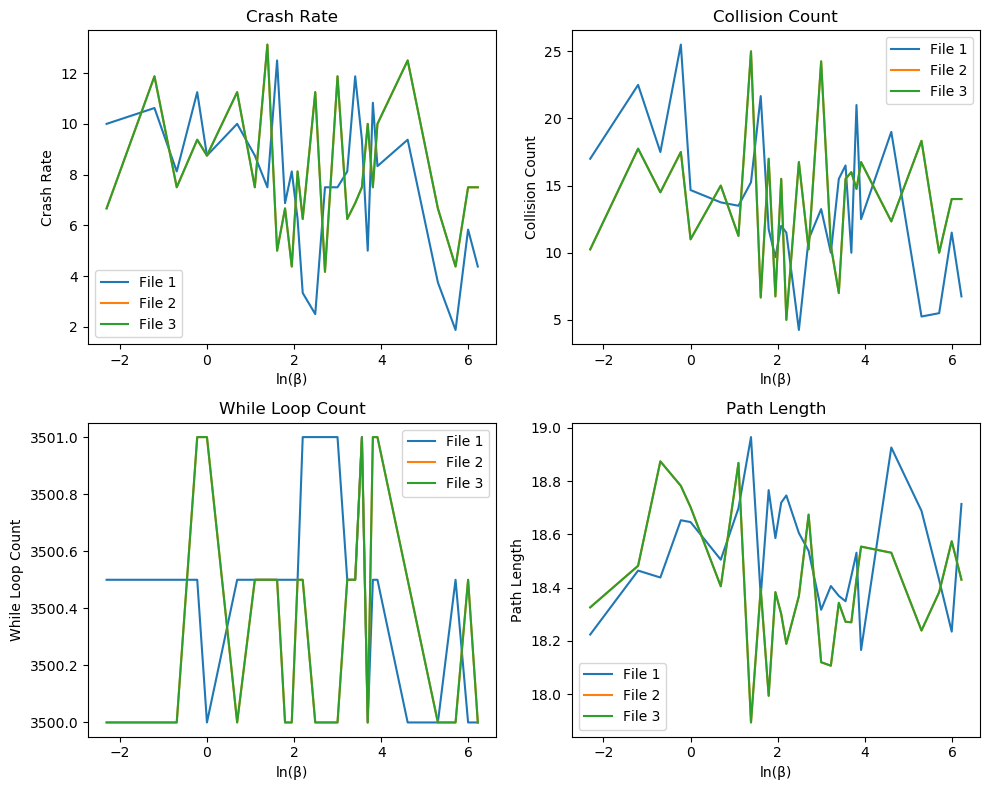

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取文件到 DataFrame
df = pd.read_csv('Beta_2D_Up_30.csv')
df3 = pd.read_csv('Beta_2D_Up_60.csv')
df2 = pd.read_csv('Beta_2D_Up_60.csv')

# 对β取对数
df['ln(β)'] = np.log(df['β'])
df2['ln(β)'] = np.log(df2['β'])
df3['ln(β)'] = np.log(df3['β'])

# 筛选出相同类型的数据
average_rows = df[df['note'] == 'averages_no_outliers']
df2_average_rows = df2[df2['note'] == 'averages_no_outliers']
df3_average_rows = df3[df3['note'] == 'averages_no_outliers']

# 设置子图布局
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 绘制每个子图
def plot_data(ax, x1, y1, x2, y2, x3, y3, label1, label2, label3, title, x_label, y_label):
    ax.plot(x1, y1, label=label1)
    ax.plot(x2, y2, label=label2)
    ax.plot(x3, y3, label=label3)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

plot_data(axs[0, 0], average_rows['ln(β)'], average_rows['crash_rate'], df2_average_rows['ln(β)'], df2_average_rows['crash_rate'], df3_average_rows['ln(β)'], df3_average_rows['crash_rate'], 'File 1', 'File 2', 'File 3', 'Crash Rate', 'ln(β)', 'Crash Rate')
plot_data(axs[0, 1], average_rows['ln(β)'], average_rows['collision_count'], df2_average_rows['ln(β)'], df2_average_rows['collision_count'], df3_average_rows['ln(β)'], df3_average_rows['collision_count'], 'File 1', 'File 2', 'File 3', 'Collision Count', 'ln(β)', 'Collision Count')
plot_data(axs[1, 0], average_rows['ln(β)'], average_rows['whileloop_count'], df2_average_rows['ln(β)'], df2_average_rows['whileloop_count'], df3_average_rows['ln(β)'], df3_average_rows['whileloop_count'], 'File 1', 'File 2', 'File 3', 'While Loop Count', 'ln(β)', 'While Loop Count')
plot_data(axs[1, 1], average_rows['ln(β)'], average_rows['path_length'], df2_average_rows['ln(β)'], df2_average_rows['path_length'], df3_average_rows['ln(β)'], df3_average_rows['path_length'], 'File 1', 'File 2', 'File 3', 'Path Length', 'ln(β)', 'Path Length')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


## 同样的方法 我们设计上下实验

In [4]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from io import StringIO

# 使用Pandas读取CSV文件
df = pd.read_csv('./benchmark_cost_scatter.csv')
# 筛选掉While Loop Count = 5000的数据条
df = df[df['whileloop_count'] != 5000]

# 读取整个文件到一个字符串
with open('benchmark_PM_scatter.csv', 'r') as file:
    data = file.readlines()

# 过滤出数字开头的行，但保留首行（列标题）
data = [data[0]] + [line for line in data[1:] if line[0].isdigit()]

# 将清洗后的数据列表转换成一个字符串
clean_data = ''.join(data)
# 使用StringIO对象来使用pd.read_csv
df_PM = pd.read_csv(StringIO(clean_data))

# 创建一个1行2列的子图布局
fig = make_subplots(rows=1, cols=2)
                    #  subplot_titles=('Collision Count vs While Loop Count', 'Crash Rate vs Path Length'))

# 定义使用的颜色
color_df = 'blue'  # df数据集的蓝色
color_df_PM = 'green'  # df_PM数据集的红色

# 第一个数据源df散点图的设置
fig.add_trace(
    go.Scatter(
        x=df['collision_count'],
        y=df['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=df[['coll_w', 'goal_w', 'reward_w']],
        marker=dict(color=color_df),
        name='Singel_layer MPPI'
    ),
    row=1, col=1
)

# 添加第二个数据源df_PM的散点图
fig.add_trace(
    go.Scatter(
        x=df_PM['collision_count'],
        y=df_PM['whileloop_count'],
        mode='markers',
        hovertemplate="Collision Count: %{x}<br>While Loop Count: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM[['judge_coll_weight']],
        marker=dict(color=color_df_PM),
        name='PM MPPI'
    ),
    row=1, col=1
)

# # 第一个数据源df散点图的X、Y轴范围
fig.update_xaxes(title_text="Collision Count", row=1, col=1)
fig.update_yaxes(title_text="While Loop Count", row=1, col=1)
# 第一个数据源df散点图的设置
fig.add_trace(
    go.Scatter(
        x=df['crash_rate'], 
        y=df['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "coll_w: %{customdata[0]}<br>" +
                      "goal_w: %{customdata[1]}<br>" +
                      "reward_w: %{customdata[2]}<extra></extra>",
        customdata=df[['coll_w', 'goal_w', 'reward_w']],
        marker=dict(color=color_df),
        name='df Crash Rate/Path Length',
        showlegend= False
    ),
    row=1, col=2
)

# 添加第二个数据源df_PM散点图的设置
fig.add_trace(
    go.Scatter(
        x=df_PM['crash_rate'], 
        y=df_PM['path_length'],
        mode='markers',
        hovertemplate="Crash Rate: %{x}<br>Path Length: %{y}<br>" +
                      "judge_coll_weight: %{customdata[0]}<extra></extra>",
        customdata=df_PM[['judge_coll_weight']],
        marker=dict(color=color_df_PM),
        name='df_PM Crash Rate/Path Length',
        showlegend=False
    ),
    row=1, col=2
)

# 第二个散点图的X轴和调整後的Y轴范围
fig.update_xaxes(title_text="Crash Rate", row=1, col=2)
fig.update_yaxes(title_text="Path Length", row=1, col=2)  # 更紧凑的范围

# 更新整体布局的设置
fig.update_layout(title_text="Combined Subplots with Custom axis ranges")

# 显示整个布局
fig.show()

# 如果你想保存图像为文件，则需要安装kaleido，并使用以下代码:
# fig.write_image("combined_plots.png")

## TODO: 选定的策略 权重 使用圆圈 圈出来
加入greedy-policy 与 sensitive-policy的结果

下面是关于轨迹可视化的操作
需要文件： SDFcostlog/visual_traj.pkl 记载了traj_log多个数据
        self.traj_log = {
                'position':[], 'velocity':[], 
                'error':[], 'command':[], 'des':[], 'coll_cost':[],
                'acc':[], 'world':None, 'bounds':self.extents , 'weights':[],
                'thresh_index':[]}


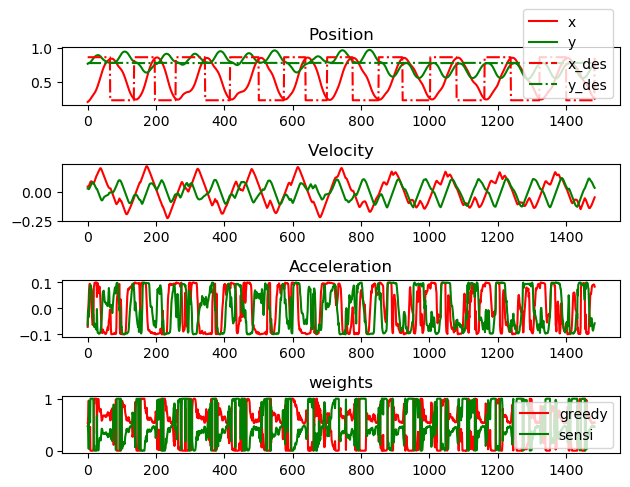

In [5]:

import  pickle

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm
matplotlib.use('tkagg')
%matplotlib inline


with open('visual_traj.pkl', 'rb') as f:
    traj_log = pickle.load(f)

plt.figure()
position = np.matrix(traj_log['position'])
vel = np.matrix(traj_log['velocity'])
coll = np.matrix(traj_log['coll_cost'])
acc = np.matrix(traj_log['acc'])
des = np.matrix(traj_log['des'])
weights = np.matrix(traj_log['weights'])
thresh_indexs = np.matrix(traj_log['thresh_index']) # shape is i * M


axs = [plt.subplot(4,1,i+1) for i in range(4)]
if(len(axs) >= 3):
    axs[0].set_title('Position')
    axs[1].set_title('Velocity')
    axs[2].set_title('Acceleration')
    axs[3].set_title('weights')
    # axs[3].set_title('Trajectory Position')
    axs[0].plot(position[:,0], 'r', label='x')
    axs[0].plot(position[:,1], 'g',label='y')
    axs[0].plot(des[:,0], 'r-.', label='x_des')
    axs[0].plot(des[:,1],'g-.', label='y_des')
    axs[0].legend()
    axs[1].plot(vel[:,0], 'r',label='x')
    axs[1].plot(vel[:,1], 'g', label='y')
    axs[2].plot(acc[:,0], 'r', label='acc')
    axs[2].plot(acc[:,1], 'g', label='acc')
    axs[3].plot(weights[:,0], 'r', label='greedy')
    axs[3].plot(weights[:,1], 'g', label='sensi')
    axs[3].legend()

plt.tight_layout()  # 可以加入这一句对图像进行优化布局
plt.show()

## 动态滑窗显示轨迹

In [6]:
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ensure that matplotlib is using the Tkinter backend for interactive plots
matplotlib.use('tkagg')

with open('visual_traj.pkl', 'rb') as f:
    traj_log = pickle.load(f)

position = np.matrix(traj_log['position'])
vel = np.matrix(traj_log['velocity'])
acc = np.matrix(traj_log['acc'])
des = np.matrix(traj_log['des'])
weights = np.matrix(traj_log['weights'])
thresh_indexs = np.matrix(traj_log['thresh_index'])  # shape is i * M

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))



window_size = 4  # Define the window size
def update(frame):
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()
    # axs[3].cla()

    axs[0].set_title('Position')
    axs[1].set_title('Velocity')
    # axs[2].set_title('Acceleration')
    axs[2].set_title('Weights')

    if frame < window_size:  # Make sure we have enough data points for a sliding window
        return
    
    thresh_index = thresh_indexs[0, frame]
    pre_index = thresh_indexs[0, frame - window_size]  # Use current frame minus window size for the sliding window
    
    # Plot data on each subplot
    axs[0].plot(position[pre_index:thresh_index, 0], 'r', label='x')
    axs[0].plot(position[pre_index:thresh_index, 1], 'g', label='y')
    axs[0].plot(des[pre_index:thresh_index, 0], 'r-.', label='x_des')
    axs[0].plot(des[pre_index:thresh_index, 1], 'g-.', label='y_des')

    axs[1].plot(vel[pre_index:thresh_index, 0], 'r', label='x')
    axs[1].plot(vel[pre_index:thresh_index, 1], 'g', label='y')

    # axs[2].plot(acc[pre_index:thresh_index, 0], 'r', label='acc')
    # axs[2].plot(acc[pre_index:thresh_index, 1], 'g', label='acc')

    axs[2].plot(weights[pre_index:thresh_index, 0], 'r', label='greedy')
    axs[2].plot(weights[pre_index:thresh_index, 1], 'g', label='sensi')

    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    # axs[3].legend()
    plt.tight_layout()

# Create the animation
ani = FuncAnimation(fig, update, frames=range(window_size, thresh_indexs.shape[1]), interval=1000)
plt.show()


## 显示一个窗口

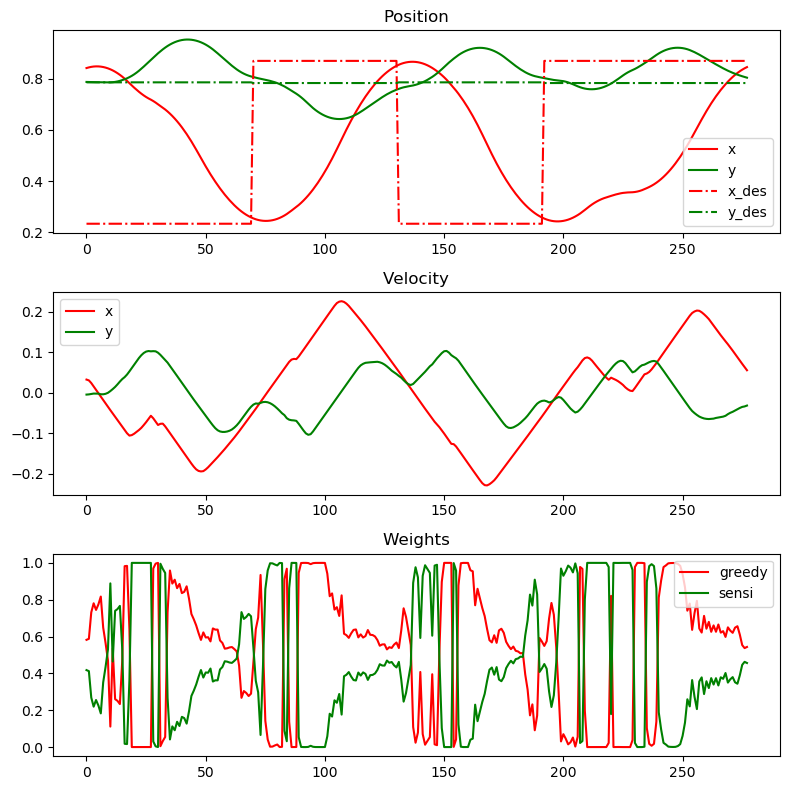

In [7]:
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib inline
with open('visual_traj.pkl', 'rb') as f:
    traj_log = pickle.load(f)

position = np.matrix(traj_log['position'])
vel = np.matrix(traj_log['velocity'])
acc = np.matrix(traj_log['acc'])
des = np.matrix(traj_log['des'])
weights = np.matrix(traj_log['weights'])
thresh_indexs = np.matrix(traj_log['thresh_index'])  # shape is i * M

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))




axs[0].set_title('Position')
axs[1].set_title('Velocity')
# axs[2].set_title('Acceleration')
axs[2].set_title('Weights')

window_size = 4  # Define the window size
frame = 5
thresh_index = thresh_indexs[0, frame]
pre_index = thresh_indexs[0, frame - window_size]  # Use current frame minus window size for the sliding window

# Plot data on each subplot
axs[0].plot(position[pre_index:thresh_index, 0], 'r', label='x')
axs[0].plot(position[pre_index:thresh_index, 1], 'g', label='y')
axs[0].plot(des[pre_index:thresh_index, 0], 'r-.', label='x_des')
axs[0].plot(des[pre_index:thresh_index, 1], 'g-.', label='y_des')

axs[1].plot(vel[pre_index:thresh_index, 0], 'r', label='x')
axs[1].plot(vel[pre_index:thresh_index, 1], 'g', label='y')

# axs[2].plot(acc[pre_index:thresh_index, 0], 'r', label='acc')
# axs[2].plot(acc[pre_index:thresh_index, 1], 'g', label='acc')

axs[2].plot(weights[pre_index:thresh_index, 0], 'r', label='greedy')
axs[2].plot(weights[pre_index:thresh_index, 1], 'g', label='sensi')

axs[0].legend()
axs[1].legend()
axs[2].legend()
# axs[3].legend()
plt.tight_layout()

plt.show()


## 动态图像可视化

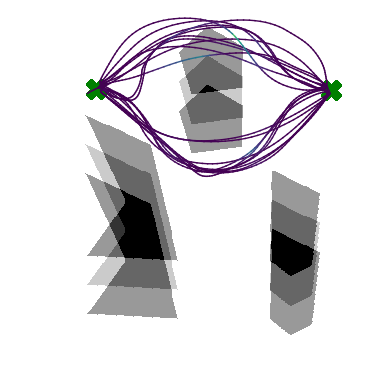

In [8]:
%matplotlib inline

#prepare trajectory background

collision_map_path = "/home/zm/MotionPolicyNetworks/storm_ws/history/storm/content/assets/collision_maps/collision_map_cem.png"
im = cv2.imread(collision_map_path,0)
_,im = cv2.threshold(im,10,255,cv2.THRESH_BINARY)
rows, cols = im.shape
shift =  30
if True: 
    movelist = np.float32([
    [[1, 0, 0], [0, 1,  shift]],
    [[1, 0, 0], [0, 1, -shift]]])
else:
    movelist = np.float32([
        [[1, 0, -shift], [0, 1, 0]],
        [[1, 0,  shift], [0, 1, 0]]])
im_down = cv2.warpAffine(im, movelist[1], (cols, rows),borderMode=cv2.BORDER_CONSTANT, borderValue=255)
im_up = cv2.warpAffine(im, movelist[0], (cols, rows),borderMode=cv2.BORDER_CONSTANT, borderValue=255)

# 创建叠加后的图像
overlay = np.zeros_like(im, dtype=np.float32)
alpha = 0.1  # 调整透明度的值
overlay[im_down > 0] += alpha
overlay[im_up > 0] += alpha

plt.figure()
extents = (traj_log['bounds'][0], traj_log['bounds'][1],
        traj_log['bounds'][2], traj_log['bounds'][3])
img_ax = plt.subplot(1,1,1)
# img_ax.imshow(self.controller.rollout_fn.image_move_collision_cost.world_coll.Start_Image,cmap='gray', extent=extents)
img_ax.imshow(im, cmap='gray',extent=extents)
img_ax.imshow(overlay, cmap='gray', alpha=0.8,extent=extents)
# img_ax.plot(np.ravel(position[0,0]), np.ravel(position[0,1]), 'rX', linewidth=3.0, markersize=15)
img_ax.plot(des[:,0], des[:,1],'gX', linewidth=3.0, markersize=15)
# img_ax.scatter(np.ravel(position[:,0]),np.ravel(position[:,1]),c=np.ravel(coll),s=np.array(2),marker='+')

cmap = cm.get_cmap('viridis')
coll = np.ravel(coll)
for i in range(len(position) - 1):
    plt.plot([position[i, 0], position[i+1, 0]], [position[i, 1], position[i+1, 1]], lw=1, color=cmap(coll[i]))
# plt.colorbar(label='Coll')
img_ax.set_xlim(traj_log['bounds'][0], traj_log['bounds'][1])
img_ax.set_ylim(traj_log['bounds'][2], traj_log['bounds'][3])
plt.axis('off')

plt.show()

## plotly 可视化

In [9]:
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Ensure that matplotlib is using the Tkinter backend for interactive plots
matplotlib.use('tkagg')

def plot_trajectory(color_dict, opacity=1.0):
    with open('visual_traj.pkl', 'rb') as f:
        traj_log = pickle.load(f)

    position = np.array(np.matrix(traj_log['position']))
    vel =      np.array(np.matrix(traj_log['velocity']))
    acc =      np.array(np.matrix(traj_log['acc']))
    des =      np.array(np.matrix(traj_log['des']))
    weights =  np.array(np.matrix(traj_log['weights']))
    thresh_indexs = np.matrix(traj_log['thresh_index'])  # shape is i * M

    # Create subplots
    fig = make_subplots(rows=3, cols=1)


    window_size = 5  # Define the window size
    frame = 7
    thresh_index = thresh_indexs[0, frame]
    pre_index = thresh_indexs[0, frame - window_size]  # Use current frame minus window size for the sliding window


    # Adjusting line styles and markers
    line_options = dict(width=2.5) # 设定统一的线宽为2
    
    # Position Traces
    fig.add_trace(go.Scatter(y=position[pre_index:thresh_index, 0], mode='lines',
                            line=dict(color=color_dict[0], **line_options),
                            legendgroup = '1',
                            name='x'), row=1, col=1,)
    fig.add_trace(go.Scatter(y=position[pre_index:thresh_index, 1], mode='lines',
                            line=dict(color=color_dict[1], **line_options), opacity=opacity,
                            legendgroup = '1',
                            name='y'), row=1, col=1)

    # Desigreen position Traces with dashed line
    fig.add_trace(go.Scatter(y=des[pre_index:thresh_index, 0], mode='lines',
                            line=dict(color=color_dict[0], dash='dashdot', **line_options),
                            legendgroup = '1',
                            name='x_des'), row=1, col=1)
    fig.add_trace(go.Scatter(y=des[pre_index:thresh_index, 1], mode='lines',
                            line=dict(color=color_dict[1], dash='dashdot', **line_options), opacity=opacity,
                            legendgroup = '1',
                            name='y_des'), row=1, col=1)

    # Velocity Traces
    fig.add_trace(go.Scatter(y=vel[pre_index:thresh_index, 0], mode='lines',
                            line=dict(color=color_dict[0], **line_options),
                            legendgroup = '2',
                            name='vx'), row=2, col=1)
    fig.add_trace(go.Scatter(y=vel[pre_index:thresh_index, 1], mode='lines',
                            line=dict(color=color_dict[1], **line_options),opacity=opacity,
                            legendgroup = '2',
                            name='vy'), row=2, col=1)

    # Weight Traces
    fig.add_trace(go.Scatter(y=weights[pre_index:thresh_index, 0], mode='lines',
                            line=dict(color=color_dict[0], **line_options),
                            legendgroup = '3',
                            name='greedy_w'), row=3, col=1)
    fig.add_trace(go.Scatter(y=weights[pre_index:thresh_index, 1], mode='lines',
                            line=dict(color=color_dict[1], **line_options ),opacity=opacity,
                            legendgroup = '3',
                            name='sensi_w'), row=3, col=1)


    # 使用 update_yaxes 方法更新 Y 轴标题，将标题移到左侧，并调整间距
    yaxis_titles = ["Position", "Velocity", "Weights"]
    for i, title in enumerate(yaxis_titles, start=1):
        fig.update_yaxes(title_text=title, row=i, col=1, title_standoff=1)  # 调整间距


    # Set X-axis title only for the bottom plot
    fig.update_xaxes(title_text="", row=1, col=1, showticklabels=False)  # Hide X-axis tick labels for the first row
    fig.update_xaxes(title_text="", row=2, col=1, showticklabels=False)  # Hide X-axis tick labels for the second row
    fig.update_xaxes(title_text="Time", row=3, col=1)  # Only bottom subplot shows the X-axis title 'Time'


    # Adjusting layout
    layout_options = dict(title_font=dict(size=16, color='black'), font=dict(size=16, color='black'))

    # Adjusting layout
    fig.update_layout(height=800, showlegend=True, 
                    legend_tracegroupgap = 180,
                    margin=dict(l=100, r=100, t=100, b=100),  # Adjust the margin to ensure titles fit
                    **layout_options
                    )
    # Show figure
    fig.show()




In [10]:

plot_trajectory(['red','green'],opacity =1.0)

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_trajectory(color_dict, opacity=1.0):
    with open('visual_traj.pkl', 'rb') as f:
        traj_log = pickle.load(f)

    position = np.array(np.matrix(traj_log['position']))
    vel = np.array(np.matrix(traj_log['velocity']))
    acc = np.array(np.matrix(traj_log['acc']))
    des = np.array(np.matrix(traj_log['des']))
    weights = np.array(np.matrix(traj_log['weights']))
    thresh_indexs = np.matrix(traj_log['thresh_index'])  # shape is i * M

    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    window_size = 5  # Define the window size
    frame = 7
    thresh_index = thresh_indexs[0, frame]
    pre_index = thresh_indexs[0, frame - window_size]  # Use current frame minus window size for the sliding window

    line_options = {'linewidth': 2}  # Set a common line width

    # Position Traces
    axs[0].plot(position[pre_index:thresh_index, 0], color=color_dict[0], label='x', **line_options)
    axs[0].plot(position[pre_index:thresh_index, 1], color=color_dict[1], label='y', alpha=opacity, **line_options)
    axs[0].plot(des[pre_index:thresh_index, 0], color=color_dict[0], linestyle='dashdot', label='x_des', **line_options)
    axs[0].plot(des[pre_index:thresh_index, 1], color=color_dict[1], linestyle='dashdot', label='y_des', alpha=opacity, **line_options)
    axs[0].set_ylabel('Position')

    # Velocity Traces
    axs[1].plot(vel[pre_index:thresh_index, 0], color=color_dict[0], label='vx', **line_options)
    axs[1].plot(vel[pre_index:thresh_index, 1], color=color_dict[1], label='vy', alpha=opacity, **line_options)
    axs[1].set_ylabel('Velocity')

    # Weight Traces
    axs[2].plot(weights[pre_index:thresh_index, 0], color=color_dict[0], label='greedy_w', **line_options)
    axs[2].plot(weights[pre_index:thresh_index, 1], color=color_dict[1], label='sensi_w', alpha=opacity, **line_options)
    axs[2].set_ylabel('Weights')

    axs[2].set_xlabel('Time')

    for ax in axs:
        ax.legend()

    plt.tight_layout()
    plt.show()




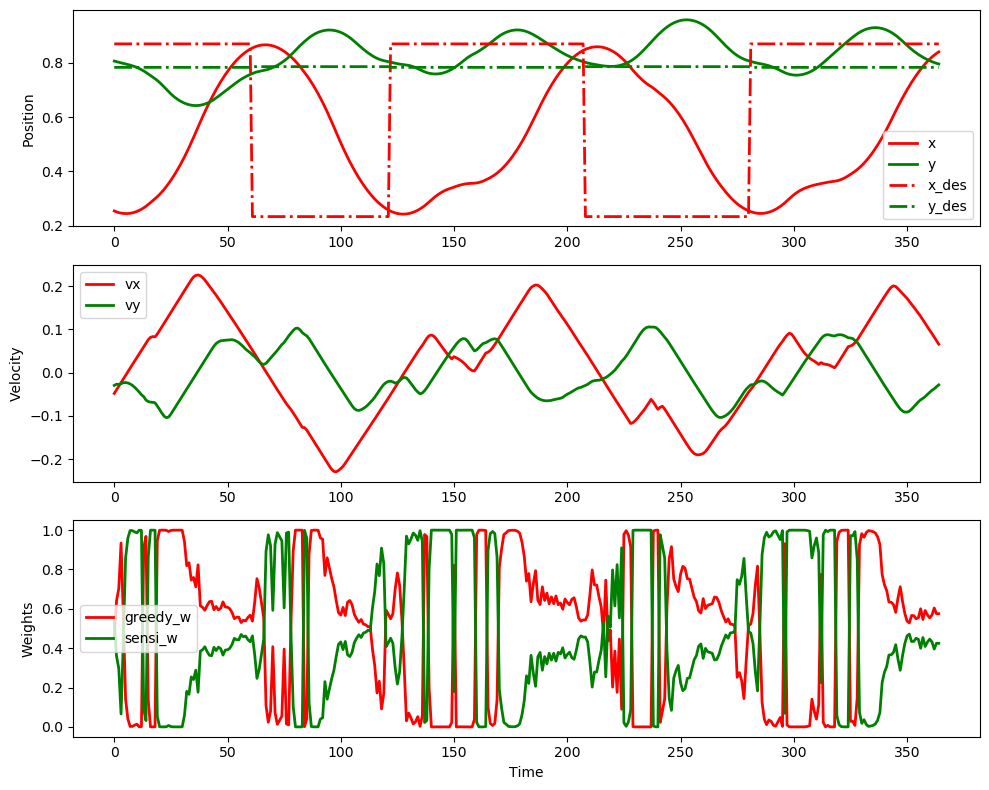

In [12]:

# Example color dictionary
color_dict = {0: 'red', 1: 'green'}

# Example usage
plot_trajectory(color_dict)

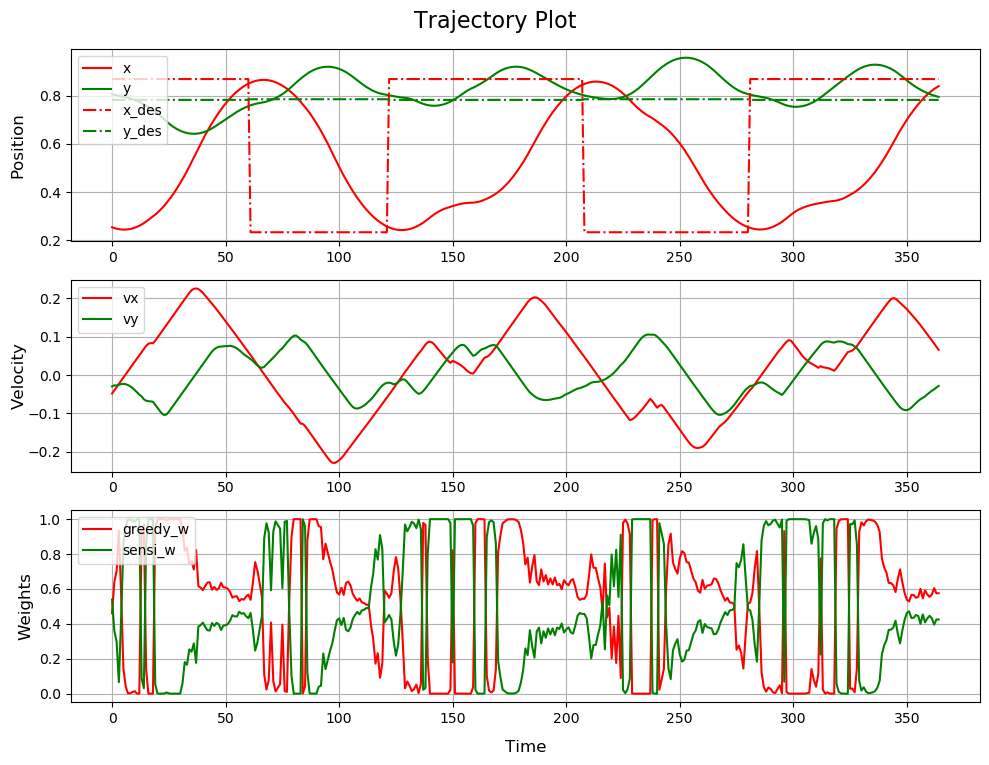

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_trajectory(color_dict, opacity=1.0):
    with open('visual_traj.pkl', 'rb') as f:
        traj_log = pickle.load(f)

    position = np.array(np.matrix(traj_log['position']))
    vel = np.array(np.matrix(traj_log['velocity']))
    acc = np.array(np.matrix(traj_log['acc']))
    des = np.array(np.matrix(traj_log['des']))
    weights = np.array(np.matrix(traj_log['weights']))
    thresh_indexs = np.matrix(traj_log['thresh_index'])  # shape is i * M

    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    window_size = 5  # Define the window size
    frame = 7
    thresh_index = thresh_indexs[0, frame]
    pre_index = thresh_indexs[0, frame - window_size]  # Use current frame minus window size for the sliding window

    line_options = {'linewidth': 1.5}  # Set a common line width

    # Position Traces
    axs[0].plot(position[pre_index:thresh_index, 0], color=color_dict[0], label='x', **line_options)
    axs[0].plot(position[pre_index:thresh_index, 1], color=color_dict[1], label='y', alpha=opacity, **line_options)
    axs[0].plot(des[pre_index:thresh_index, 0], color=color_dict[0], linestyle='dashdot', label='x_des', **line_options)
    axs[0].plot(des[pre_index:thresh_index, 1], color=color_dict[1], linestyle='dashdot', label='y_des', alpha=opacity, **line_options)
    axs[0].set_ylabel('Position', fontsize=12,labelpad=10) # Adjust font size of y-axis label
    axs[0].grid(True)

    # Velocity Traces
    axs[1].plot(vel[pre_index:thresh_index, 0], color=color_dict[0], label='vx', **line_options)
    axs[1].plot(vel[pre_index:thresh_index, 1], color=color_dict[1], label='vy', alpha=opacity, **line_options)
    axs[1].set_ylabel('Velocity', fontsize=12, labelpad=0) # Adjust font size of y-axis label
    axs[1].grid(True)

    # Weight Traces
    axs[2].plot(weights[pre_index:thresh_index, 0], color=color_dict[0], label='greedy_w', **line_options)
    axs[2].plot(weights[pre_index:thresh_index, 1], color=color_dict[1], label='sensi_w', alpha=opacity, **line_options)
    axs[2].set_ylabel('Weights', fontsize=12)  # Adjust font size of y-axis label
    axs[2].set_xlabel('Time', fontsize=12,labelpad=10)  # Adjust font size of x-axis label
    axs[2].grid(True)

    for ax in axs:
        ax.legend(loc='upper left')

    plt.suptitle('Trajectory Plot', fontsize=16)  # Adding a title
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting layout to accommodate the title
    plt.show()

# Example color dictionary
color_dict = {0: 'red', 1: 'green'}

# Example usage
plot_trajectory(color_dict)
